# Software Engineering for Molecular Data Scientists

## *Introduction to Python & Pandas*

## Today's Objectives

#### 1. Loading data with ``pandas``

#### 2. Cleaning and Manipulating data with ``pandas``

## 1. Loading data with ``pandas``

With this simple Python computation experience under our belt, we can now move to doing some more interesting analysis.

### Python's Data Science Ecosystem

In addition to Python's built-in modules like the ``math`` module we explored above, there are also many often-used third-party modules that are core tools for doing data science with Python.
Some of the most important ones are:

#### [``numpy``](http://numpy.org/): Numerical Python

Numpy is short for "Numerical Python", and contains tools for efficient manipulation of arrays of data.
If you have used other computational tools like IDL or MatLab, Numpy should feel very familiar.

#### [``scipy``](http://scipy.org/): Scientific Python

Scipy is short for "Scientific Python", and contains a wide range of functionality for accomplishing common scientific tasks, such as optimization/minimization, numerical integration, interpolation, and much more.
We will not look closely at Scipy today, but we will use its functionality later in the course.

#### [``pandas``](http://pandas.pydata.org/): Labeled Data Manipulation in Python

Pandas is short for "Panel Data", and contains tools for doing more advanced manipulation of labeled data in Python, in particular with a columnar data structure called a *Data Frame*.
If you've used the [R](http://rstats.org) statistical language (and in particular the so-called "Hadley Stack"), much of the functionality in Pandas should feel very familiar.

#### [``matplotlib``](http://matplotlib.org): Visualization in Python

Matplotlib started out as a Matlab plotting clone in Python, and has grown from there in the 15 years since its creation. It is the most popular data visualization tool currently in the Python data world (though other recent packages are starting to encroach on its monopoly).

### Installing Pandas & friends

Because the above packages are not included in Python itself, you need to install them separately. While it is possible to install these from source (compiling the C and/or Fortran code that does the heavy lifting under the hood) it is much easier to use a package manager like ``conda``. All it takes is to run

```
$ conda install numpy scipy pandas matplotlib
```

and (so long as your conda setup is working) the packages will be downloaded and installed on your system.

### Loading Data with Pandas

In [3]:
#replaces all even numbers in a list with None
items = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
new_items = [x if x % 2 else None  for x in items]

In [4]:
items

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [5]:
new_items

[None, 1, None, 3, None, 5, None, 7, None, 9, None]

In [6]:
import pandas as pd
import numpy

In [7]:
numpy.__path__

['C:\\Users\\Yohan_Min\\Anaconda3\\lib\\site-packages\\numpy']

In [8]:
pd.__path__

['C:\\Users\\Yohan_Min\\Anaconda3\\lib\\site-packages\\pandas']

Because we'll use it so much, we often import under a shortened name using the ``import ... as ...`` pattern:

In [9]:
!ls

dsmcer-hw1-reconjohn
dsmcer-hw2-reconjohn
HCEPDB
HCEPDB_moldata.zip
Jupyter Notebook In Depth.ipynb
L10_DecisionTrees_filled.ipynb
L11_PCA_Kmeans_filled.ipynb
L12_Neural_Networks_filled.ipynb
L2.Simple_Breakout.ipynb
L2_Visualization.ipynb
L3_Descriptive_Statistics.ipynb
L4.Python.ipynb
L4_Distributions.ipynb
L5.Procedural_Python.ipynb
L5_Hypothesis_testing_filled.ipynb
L6_MLIntro_filled.ipynb
L7_Regression_filled.ipynb
L8_SubsetRegularization_filled.ipynb
L9_Image_Analysis_filled.ipynb
molecules
seds-hw1-reconjohn
seds-hw2-reconjohn
setup.sh
Untitled.ipynb


In [10]:
!pwd

/c/Users/Yohan_Min/DIRECT


Now we can use the ``read_csv`` command to read the comma-separated-value data:

In [11]:
data = pd.read_csv('HCEPDB/HCEPDB_moldata.csv')

*Note: strings in Python can be defined either with double quotes or single quotes*

### Viewing Pandas Dataframes

The ``head()`` and ``tail()`` methods show us the first and last rows of the data

In [12]:
data.head()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
0,655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1
1,1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...
2,21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...
3,65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...
4,720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1


In [13]:
data.tail()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
2322844,2543603,[SiH2]1ccc2csc(c12)-c1sc(c2[SiH2]ccc12)-c1cnc(...,C22H14N4S3Si2,486.7506,0.000000,0.000000,0.000000,-5.632512,1.454082,-4.178430,c1sc(c2[SiH2]ccc12)-c1sc(c2[SiH2]ccc12)-c1cnc(...
2322845,2304057,[SiH2]1ccc2csc(c12)-c1sc(c2[SiH2]ccc12)-c1ccc(...,C22H14N4S3Si2,486.7506,9.335485,1.120744,128.197094,-5.720744,1.798600,-3.922144,c1sc(c2[SiH2]ccc12)-c1sc(c2[SiH2]ccc12)-c1ccc(...
2322846,2007035,[SiH2]1ccc2csc(c12)-c1sc(c2[SiH2]ccc12)-c1ccc(...,C26H18S3Si2,482.7982,2.498209,0.834995,46.046052,-5.434995,2.433160,-3.001835,c1sc(c2[SiH2]ccc12)-c1sc(c2[SiH2]ccc12)-c1ccc(...
2322847,1961981,C1ccc2c1c(sc2-c1scc2cc[SiH2]c12)-c1ccc(cc1)-c1...,C25H16S3SeSi,519.6454,2.679067,0.659243,62.544032,-5.259243,2.258468,-3.000775,c1sc(c2[SiH2]ccc12)-c1sc(c2Cccc12)-c1ccc(cc1)-...
2322848,2754558,[SiH2]1ccc2csc(c12)-c1sc(-c2sc(-c3scc4ccsc34)c...,C24H13NOS5Si,519.7887,1.272400,0.102802,190.489616,-4.702802,1.490950,-3.211851,c1sc(c2[SiH2]ccc12)-c1sc(-c2sc(-c3scc4ccsc34)c...


The ``shape`` attribute shows us the number of elements:

In [14]:
type(data)

pandas.core.frame.DataFrame

In [15]:
data.shape

(2322849, 11)

The ``columns`` attribute gives us the column names

In [16]:
data.columns

Index(['id', 'SMILES_str', 'stoich_str', 'mass', 'pce', 'voc', 'jsc',
       'e_homo_alpha', 'e_gap_alpha', 'e_lumo_alpha', 'tmp_smiles_str'],
      dtype='object')

The ``index`` attribute gives us the index names

In [17]:
data.index

RangeIndex(start=0, stop=2322849, step=1)

Let's make our ``id`` column the ``index``

In [18]:
data.set_index('id') # or
data.set_index('id', inplace=True)

Now let's revisit the ``data.index``

In [19]:
data.index

Int64Index([ 655365, 1245190,   21847,   65553,  720918, 1310744,  196637,
             262174,  393249,      35,
            ...
            1703911, 1814506, 2559314, 2351086, 1712111, 2543603, 2304057,
            2007035, 1961981, 2754558],
           dtype='int64', name='id', length=2322849)

View it with head again:

In [20]:
data.head()

,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
id,,,,,,,,,,
655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1
1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...
21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...
65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...
720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1


The ``dtypes`` attribute gives the data types of each column:

In [21]:
data.dtypes

SMILES_str         object
stoich_str         object
mass              float64
pce               float64
voc               float64
jsc               float64
e_homo_alpha      float64
e_gap_alpha       float64
e_lumo_alpha      float64
tmp_smiles_str     object
dtype: object

## 2. Manipulating data with ``pandas``

Here we'll cover some key features of manipulating data with pandas

Access columns by name using square-bracket indexing:

In [22]:
data['mass']

id
655365     394.3151
1245190    400.4135
21847      363.4903
65553      319.4448
720918     379.3398
1310744    454.4137
196637     404.2520
262174     444.2730
393249     396.3495
35         292.4328
1048612    290.4606
917542     489.1948
1441831    335.2668
1376296    443.5024
1638442    393.5445
98350      340.5204
2162747    429.6251
557119     258.3186
753728     336.4684
819265     459.5774
1278019    394.6522
2096063    509.5136
2752585    412.5660
1572945    389.3786
2359381    434.5416
1540183    455.2999
1638500    385.3226
2621542    368.4770
98411      402.3777
524398     393.5445
             ...   
2705444    483.7863
2925216    520.7728
2742210    520.7728
3092419    485.7625
1253317    427.6983
1841096    467.7193
2770889    467.7113
1816522    472.7514
1810382    467.7193
1648591    504.7058
2705360    503.7217
2349009    471.7753
3091107    534.8756
8152       508.4810
1781722    472.7634
2470223    535.8557
2469856    501.7495
1912803    504.7058
1216485    408.67

Mathematical operations on columns happen *element-wise* (note 18.01528 is the weight of H2O):

Columns can be created (or overwritten) with the assignment operator.
Let's create a *mass_ratio_H2O* column with the mass ratio of each molecule to H2O

In [23]:
data['mass_ratio'] = data['mass']/ 18.015

In [24]:
data.head()

,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str,mass_ratio
id,,,,,,,,,,,
655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,21.888154
1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...,22.226672
21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...,20.177091
65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...,17.732157
720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1,21.056886


In preparation for grouping the data, let's bin the molecules by their molecular mass. For that, we'll use ``pd.cut``

In [25]:
data['mass_group'] = pd.cut(data['mass'], 10)

In [26]:
data.head()

,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str,mass_ratio,mass_group
id,,,,,,,,,,,,
655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,21.888154,"(375.486, 427.298]"
1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...,22.226672,"(375.486, 427.298]"
21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...,20.177091,"(323.674, 375.486]"
65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...,17.732157,"(271.862, 323.674]"
720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1,21.056886,"(375.486, 427.298]"


In [27]:
data.dtypes

SMILES_str          object
stoich_str          object
mass               float64
pce                float64
voc                float64
jsc                float64
e_homo_alpha       float64
e_gap_alpha        float64
e_lumo_alpha       float64
tmp_smiles_str      object
mass_ratio         float64
mass_group        category
dtype: object

### Simple Grouping of Data

The real power of Pandas comes in its tools for grouping and aggregating data. Here we'll look at *value counts* and the basics of *group-by* operations.

#### Value Counts

Pandas includes an array of useful functionality for manipulating and analyzing tabular data.
We'll take a look at two of these here.

The ``pandas.value_counts`` returns statistics on the unique values within each column.

We can use it, for example, to break down the molecules by their mass group that we just created:

In [28]:
data['mass_group']

id
655365     (375.486, 427.298]
1245190    (375.486, 427.298]
21847      (323.674, 375.486]
65553      (271.862, 323.674]
720918     (375.486, 427.298]
1310744    (427.298, 479.111]
196637     (375.486, 427.298]
262174     (427.298, 479.111]
393249     (375.486, 427.298]
35         (271.862, 323.674]
1048612    (271.862, 323.674]
917542     (479.111, 530.923]
1441831    (323.674, 375.486]
1376296    (427.298, 479.111]
1638442    (375.486, 427.298]
98350      (323.674, 375.486]
2162747    (427.298, 479.111]
557119      (220.05, 271.862]
753728     (323.674, 375.486]
819265     (427.298, 479.111]
1278019    (375.486, 427.298]
2096063    (479.111, 530.923]
2752585    (375.486, 427.298]
1572945    (375.486, 427.298]
2359381    (427.298, 479.111]
1540183    (427.298, 479.111]
1638500    (375.486, 427.298]
2621542    (323.674, 375.486]
98411      (375.486, 427.298]
524398     (375.486, 427.298]
                  ...        
2705444    (479.111, 530.923]
2925216    (479.111, 530.923]
2742210

In [29]:
pd.value_counts(data['mass_group'])

(375.486, 427.298]    749908
(427.298, 479.111]    729369
(323.674, 375.486]    395811
(479.111, 530.923]    247833
(271.862, 323.674]    132159
(530.923, 582.735]     41111
(220.05, 271.862]      21253
(582.735, 634.547]      4176
(167.72, 220.05]         937
(634.547, 686.359]       292
Name: mass_group, dtype: int64

What happens if we try this on a continuous valued variable?

In [30]:
pd.value_counts(data['pce'])

0.000000    109854
1.334476         6
2.229965         4
3.378631         4
0.832335         4
1.757805         4
1.748131         4
0.611385         4
2.347740         4
2.455332         4
2.056930         4
1.608040         4
6.193170         4
4.878460         4
4.075839         4
1.960030         4
3.146475         4
0.313562         4
1.478590         4
1.848397         4
5.641962         4
1.626072         4
2.387791         4
0.879680         4
3.100729         4
2.476426         4
0.490215         4
1.010616         4
2.441131         4
5.540558         4
             ...  
2.729901         1
2.777837         1
3.411103         1
1.502644         1
6.706605         1
4.088114         1
2.680453         1
2.035536         1
6.631585         1
3.110992         1
1.118627         1
1.411595         1
4.541150         1
6.235040         1
2.247999         1
5.689173         1
7.154354         1
1.232087         1
2.282375         1
5.728708         1
5.578350         1
3.953680    

We can do a little data exploration with this to look 0s in columns.  Here, let's look at the power conversion effeciency (``pce``)

In [31]:
pd.value_counts(data['mass_group'], sort=False)

(167.72, 220.05]         937
(220.05, 271.862]      21253
(271.862, 323.674]    132159
(323.674, 375.486]    395811
(375.486, 427.298]    749908
(427.298, 479.111]    729369
(479.111, 530.923]    247833
(530.923, 582.735]     41111
(582.735, 634.547]      4176
(634.547, 686.359]       292
Name: mass_group, dtype: int64

### Group-by Operation

One of the killer features of the Pandas dataframe is the ability to do group-by operations.
You can visualize the group-by like this (image borrowed from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do))

![image](split_apply_combine.png)

Let's break take this in smaller steps.
Recall our ``mass_group`` column.

In [32]:
type(pd.value_counts(data['mass_group'], sort=False))

pandas.core.series.Series

groupby allows us to look at the number of values for each column and each value.

In [33]:
data.groupby(['mass_group']).count()

,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str,mass_ratio
mass_group,,,,,,,,,,,
"(167.72, 220.05]",937,937,937,937,937,937,937,937,937,844,937
"(220.05, 271.862]",21253,21253,21253,21253,21253,21253,21253,21253,21253,20080,21253
"(271.862, 323.674]",132159,132159,132159,132159,132159,132159,132159,132159,132159,124329,132159
"(323.674, 375.486]",395811,395811,395811,395811,395811,395811,395811,395811,395811,373490,395811
"(375.486, 427.298]",749908,749908,749908,749908,749908,749908,749908,749908,749908,715158,749908
"(427.298, 479.111]",729369,729369,729369,729369,729369,729369,729369,729369,729369,699620,729369
"(479.111, 530.923]",247833,247833,247833,247833,247833,247833,247833,247833,247833,236177,247833
"(530.923, 582.735]",41111,41111,41111,41111,41111,41111,41111,41111,41111,39588,41111
"(582.735, 634.547]",4176,4176,4176,4176,4176,4176,4176,4176,4176,4093,4176


Now, let's find the mean of each of the columns for each ``mass_group``.  *Notice* what happens to the non-numeric columns.

In [34]:
type(data.groupby(['mass_group']).count())

pandas.core.frame.DataFrame

You can specify a groupby using the names of table columns and compute other functions, such as the ``sum``, ``count``, ``std``, and ``describe``.

In [35]:
data.groupby(['mass_group']).mean()
data.groupby(['mass_group']).max()

,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,mass_ratio
mass_group,,,,,,,,,,
"(167.72, 220.05]",c1ncc(s1)-c1cnc2ccncc2c1,C9H9NSSi2,219.4151,5.746969,2.178957,158.086057,-4.246327,3.709872,-1.173109,12.179578
"(220.05, 271.862]",n1-c2ccoc2-c2cnc3ccc4ccccc4c3c12,C9H7NSSeSi,271.4511,10.956561,2.135583,251.201498,-4.017991,3.803964,-1.148421,15.068060
"(271.862, 323.674]",n1-c2ccsc2-c2cnc3ccc4ccccc4c3c12,C9H5NSSe2,323.5987,11.062819,2.103816,338.396979,-3.933878,3.630997,-1.466408,17.962737
"(323.674, 375.486]",n1-c2ccsc2-c2c1c1c3nsnc3ccc1c1nsnc21,C29H22,375.4747,11.116338,1.991945,344.290570,-4.012532,3.420110,-1.758757,20.842337
"(375.486, 427.298]",n1-c2ccc3nsnc3c2-c2c1c1c3nsnc3ccc1c1nsnc21,C32H20,427.2979,11.130131,1.889978,360.328892,-3.632374,3.217278,-1.923179,23.719006
"(427.298, 479.111]",c1scc2c1ccc1sc3cc4cc(sc4cc3c21)-c1scc2nccnc12,C30H18Se,478.8302,11.125494,1.727473,393.102565,-4.121300,3.098602,-2.200059,26.579528
"(479.111, 530.923]",c1scc2c1ccc1sc3cc4cc(-c5scc6nccnc56)c5nsnc5c4c...,C28H18Se2,530.7120,11.118864,1.713406,397.038257,-4.110875,2.931612,-2.304438,29.459450
"(530.923, 582.735]",c1scc2c1ccc1sc3c4[se]c(cc4c4nsnc4c3c21)-c1scc2...,C27H15NSSe2,582.6341,11.112351,1.567629,363.011739,-4.279071,2.705206,-2.443989,32.341610
"(582.735, 634.547]",c1scc2c1ccc1c3nsnc3c3c4[se]c(cc4[se]c3c21)-c1n...,C26H14SSe3,634.4249,11.020831,1.257103,337.393923,-4.603619,2.310532,-2.717617,35.216481


The simplest version of a groupby looks like this, and you can use almost any aggregation function you wish (mean, median, sum, minimum, maximum, standard deviation, count, etc.)

```
<data object>.groupby(<grouping values>).<aggregate>()
```

You can even group by multiple values: for example we can look at the LUMO-HOMO gap grouped by the ``mass_group`` and ``pce``.

In [36]:
data.groupby(['mass_group']).describe()

e_gap_alpha                                          \
                         count      mean       std       min       25%   
mass_group                                                               
(167.72, 220.05]         937.0  2.782885  0.384504  1.642611  2.505009   
(220.05, 271.862]      21253.0  2.492683  0.388696  1.228025  2.227357   
(271.862, 323.674]    132159.0  2.287170  0.388111  0.917213  2.016161   
(323.674, 375.486]    395811.0  2.091818  0.372128  0.824962  1.828255   
(375.486, 427.298]    749908.0  1.903792  0.361831 -0.002940  1.643767   
(427.298, 479.111]    729369.0  1.742163  0.346713  0.705384  1.485848   
(479.111, 530.923]    247833.0  1.667151  0.325308  0.660678  1.428270   
(530.923, 582.735]     41111.0  1.593890  0.307444  0.772695  1.358186   
(582.735, 634.547]      4176.0  1.545764  0.283620  0.928013  1.306125   
(634.547, 686.359]       292.0  1.541983  0.275489  1.031964  1.271857   

                                                 e_homo_alpha            \
                         50%       75%       max        count      mean   
mass_group                                                                
(167.72, 220.05]    2.826102  3.081353  3.709872        937.0 -5.401061   
(220.05, 271.862]   2.509431  2.775725  3.803964      21253.0 -5.267026   
(271.862, 323.674]  2.308642  2.572686  3.630997     132159.0 -5.257699   
(323.674, 375.486]  2.103711  2.367333  3.420110     395811.0 -5.233774   
(375.486, 427.298]  1.900081  2.168426  3.217278     749908.0 -5.183407   
(427.298, 479.111]  1.728795  1.992275  3.098602     729369.0 -5.136794   
(479.111, 530.923]  1.657571  1.901840  2.931612     247833.0 -5.115852   
(530.923, 582.735]  1.586800  1.830379  2.705206      41111.0 -5.117461   
(582.735, 634.547]  1.554559  1.779961  2.310532       4176.0 -5.106992   
(634.547, 686.359]  1.655633  1.751413  2.005756        292.0 -5.049109   

                      ...          pce                  voc            \
                      ...          75%        max     count      mean   
mass_group            ...                                               
(167.72, 220.05]      ...     1.325538   5.746969     937.0  0.815517   
(220.05, 271.862]     ...     2.252834  10.956561   21253.0  0.673716   
(271.862, 323.674]    ...     3.182373  11.062819  132159.0  0.660835   
(323.674, 375.486]    ...     4.383033  11.116338  395811.0  0.625780   
(375.486, 427.298]    ...     5.508474  11.130131  749908.0  0.566805   
(427.298, 479.111]    ...     6.232374  11.125494  729369.0  0.509674   
(479.111, 530.923]    ...     6.461316  11.118864  247833.0  0.467202   
(530.923, 582.735]    ...     6.801271  11.112351   41111.0  0.434818   
(582.735, 634.547]    ...     7.011431  11.020831    4176.0  0.421064   
(634.547, 686.359]    ...     6.152368  10.858928     292.0  0.411735   

                                                                           
                         std  min       25%       50%       75%       max  
mass_group                                                                 
(167.72, 220.05]    0.533102  0.0  0.356289  0.826392  1.232407  2.178957  
(220.05, 271.862]   0.409008  0.0  0.364168  0.654111  0.960279  2.135583  
(271.862, 323.674]  0.389427  0.0  0.369763  0.647530  0.930337  2.103816  
(323.674, 375.486]  0.343590  0.0  0.381265  0.622963  0.861813  1.991945  
(375.486, 427.298]  0.297632  0.0  0.360425  0.564526  0.770951  1.889978  
(427.298, 479.111]  0.261850  0.0  0.332116  0.504674  0.684969  1.727473  
(479.111, 530.923]  0.258014  0.0  0.293940  0.467629  0.641571  1.713406  
(530.923, 582.735]  0.252551  0.0  0.273097  0.452529  0.610931  1.567629  
(582.735, 634.547]  0.223863  0.0  0.307047  0.458763  0.576283  1.257103  
(634.547, 686.359]  0.156569  0.0  0.344204  0.433973  0.503132  0.862476  

[10 rows x 64 columns]

In [37]:
data.describe()

,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,mass_ratio
count,2.322849e+06,2.322849e+06,2.322849e+06,2.322849e+06,2.322849e+06,2.322849e+06,2.322849e+06,2.322849e+06
mean,4.155640e+02,3.924612e+00,5.520989e-01,1.204695e+02,-5.173904e+00,1.881213e+00,-3.292690e+00,2.306767e+01
std,5.985317e+01,2.507639e+00,3.037830e-01,6.676970e+01,3.028554e-01,4.002805e-01,3.902608e-01,3.322407e+00
min,1.682378e+02,0.000000e+00,0.000000e+00,0.000000e+00,-7.512315e+00,-2.939619e-03,-6.086537e+00,9.338762e+00
25%,3.784536e+02,2.058252e+00,3.428861e-01,6.967192e+01,-5.367790e+00,1.588780e+00,-3.587081e+00,2.100769e+01
50%,4.155597e+02,3.419332e+00,5.405897e-01,1.119042e+02,-5.158766e+00,1.866297e+00,-3.280963e+00,2.306743e+01
75%,4.566924e+02,5.607110e+00,7.499653e-01,1.627444e+02,-4.966306e+00,2.161109e+00,-3.006803e+00,2.535067e+01
max,6.863590e+02,1.113013e+01,2.178957e+00,3.970383e+02,-3.632374e+00,3.803964e+00,-1.148421e+00,3.809931e+01


In [38]:
data.groupby(['mass_group'])['pce'].describe()

,count,mean,std,min,25%,50%,75%,max
mass_group,,,,,,,,
"(167.72, 220.05]",937.0,0.984688,0.873994,0.0,0.413301,0.786599,1.325538,5.746969
"(220.05, 271.862]",21253.0,1.658181,1.342245,0.0,0.735355,1.331621,2.252834,10.956561
"(271.862, 323.674]",132159.0,2.372569,1.727534,0.0,1.173593,1.984474,3.182373,11.062819
"(323.674, 375.486]",395811.0,3.210127,2.155961,0.0,1.685650,2.728819,4.383033,11.116338
"(375.486, 427.298]",749908.0,3.918477,2.415250,0.0,2.133770,3.439810,5.508474,11.130131
"(427.298, 479.111]",729369.0,4.441766,2.563312,0.0,2.506528,4.077387,6.232374,11.125494
"(479.111, 530.923]",247833.0,4.480230,2.729844,0.0,2.485322,4.070540,6.461316,11.118864
"(530.923, 582.735]",41111.0,4.535071,2.936067,0.0,2.501887,4.038260,6.801271,11.112351
"(582.735, 634.547]",4176.0,4.694802,2.948578,0.0,3.017875,4.043051,7.011431,11.020831


In [39]:
data.groupby(['mass_group','pce'])['e_gap_alpha'].mean()

mass_group          pce      
(167.72, 220.05]    0.000000     2.412702
                    0.000245     2.099989
                    0.004285     2.953079
                    0.005825     3.073889
                    0.008490     2.722965
                    0.008899     2.136513
                    0.044463     2.452195
                    0.046568     2.823902
                    0.046691     3.114940
                    0.048831     3.140034
                    0.052351     2.884674
                    0.055327     2.728120
                    0.059029     2.880716
                    0.061336     2.844688
                    0.072549     3.090869
                    0.079122     3.159215
                    0.080511     3.364599
                    0.083184     2.854799
                    0.084001     1.942450
                    0.084225     1.974778
                    0.094322     3.709872
                    0.101431     2.850968
                    0.104110     2.307507
    

## 5. Visualizing data with ``pandas``

Of course, looking at tables of data is not very intuitive.
Fortunately Pandas has many useful plotting functions built-in, all of which make use of the ``matplotlib`` library to generate plots.

Whenever you do plotting in the Jupyter notebook, you will want to first run this *magic command* which configures the notebook to work well with plots:

In [54]:
import matplotlib
%matplotlib inline

Now we can simply call the ``plot()`` method of any series or dataframe to get a reasonable view of the data:

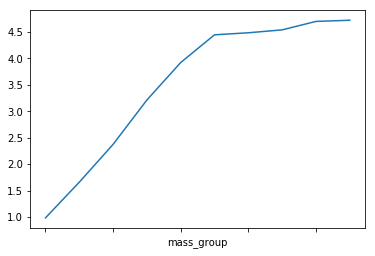

In [55]:
data.groupby(['mass_group'])['pce'].mean().plot()

In [56]:
data.groupby(['mass_group'])['pce'].mean()

mass_group
(167.72, 220.05]      0.984688
(220.05, 271.862]     1.658181
(271.862, 323.674]    2.372569
(323.674, 375.486]    3.210127
(375.486, 427.298]    3.918477
(427.298, 479.111]    4.441766
(479.111, 530.923]    4.480230
(530.923, 582.735]    4.535071
(582.735, 634.547]    4.694802
(634.547, 686.359]    4.716907
Name: pce, dtype: float64

### Other plot types

Pandas supports a range of other plotting types; you can find these by using the <TAB> autocomplete on the ``plot`` method:

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([ 9.5,  9.6,  9.7,  9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5]),
 <a list of 10 Patch objects>)

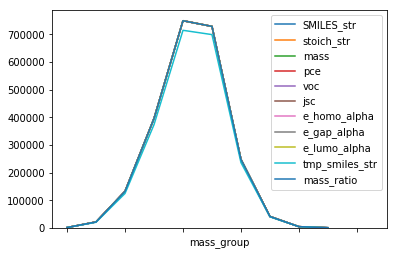

In [57]:
data.groupby(['mass_group']).count().plot().hist(10)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([ 9.5,  9.6,  9.7,  9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5]),
 <a list of 10 Patch objects>)

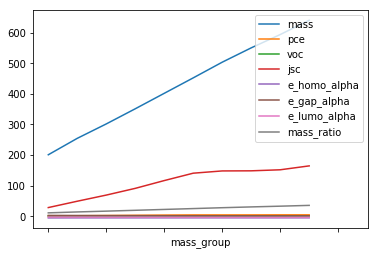

In [44]:
data.groupby(['mass_group']).mean().plot().hist(10)